In [ ]:
!pip install -U sentence-transformers

     |████████████████████████████████| 81kB 4.5MB/s 
     |████████████████████████████████| 2.0MB 10.8MB/s 
     |████████████████████████████████| 1.2MB 40.2MB/s 
     |████████████████████████████████| 890kB 40.9MB/s 
     |████████████████████████████████| 3.2MB 39.4MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-1.0.3-cp37-none-any.whl size=114277 sha256=1b8618111cdcd71445171ec1c78453a91e4a19f0d68e7c90d83ecadee0654c0e
  Stored in directory: /root/.cache/pip/wheels/c8/0d/fa/4e28cf045da4781344e7972befb2fdf306051b225bfc290187
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=5e167d1a1cfd2913caf8d1a4c40b4d6fda10b5d7be25cf52c3f8a925fd616704
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sentence-transformers sacremoses


In [ ]:
from sentence_transformers import SentenceTransformer

In [ ]:
model = SentenceTransformer('bert-base-nli-mean-tokens')

In [ ]:
sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.', 
    'The quick brown fox jumps over the lazy dog.']
sentence_embeddings = model.encode(sentences)

print("Sentence embeddings:")
print(sentence_embeddings)

Sentence embeddings:
[[-0.10409493  0.5274767   1.179773   ... -0.43389142 -0.6945236
   0.5386929 ]
 [-0.13118455 -0.173903    1.1052188  ...  0.02624436 -0.00269847
   0.91611063]
 [-0.7489926   0.71891737 -1.0394562  ...  0.15582635  1.0202512
   0.09790406]]


In [ ]:
print(type(sentence_embeddings))

<class 'numpy.ndarray'>


In [ ]:
print(sentence_embeddings.shape)

(3, 768)


In [ ]:
sentences = ['This framework generates embeddings for each input sentence. Sentences are passed as a list of string. The quick brown fox jumps over the lazy dog.']
sentence_embeddings = model.encode(sentences)

print(sentence_embeddings.shape)
print("Sentence embeddings:")
print(sentence_embeddings)


(1, 768)
Sentence embeddings:
[[-5.09060979e-01  1.02149987e+00 -2.89236665e-01  3.26976762e-03
  -2.26842761e-02 -1.20847963e-01  4.80476797e-01 -6.31629467e-01
  -4.30264413e-01 -4.15172607e-01 -7.17051923e-01  8.11524153e-01
  -3.46210182e-01 -8.14107656e-01 -2.17540681e-01  1.00924075e-01
   1.57960638e-01 -4.15184379e-01 -5.13937660e-02 -3.26724499e-01
  -8.09451103e-01 -3.21518779e-01 -1.18642652e+00 -7.87028372e-01
   1.08192503e+00  5.19267440e-01  3.00998867e-01  8.14692199e-01
  -1.73008752e+00  4.59424317e-01 -3.51912707e-01  2.28337824e-01
   6.21424437e-01 -2.64171511e-01 -6.80789530e-01  2.92581379e-01
   6.41400218e-01 -1.64992109e-01  3.95605296e-01  1.35874629e-01
   3.99487704e-01  4.60038722e-01  2.55142510e-01 -6.95197955e-02
  -1.09245467e+00 -1.88056633e-01 -9.27392244e-01  2.51151770e-01
   7.38964319e-01 -1.44188643e-01 -1.03498347e-01  9.59401488e-01
  -8.57709795e-02  5.22120148e-02 -4.49553221e-01 -1.33083299e-01
   9.25792396e-01 -1.08631030e-01 -8.06966484e

In [ ]:
import json

In [ ]:
data = json.loads(open("dataset_wordseye_724.json", "r").read())

In [ ]:
print(type(data))

<class 'dict'>


In [ ]:
print(data)

{'dataset': 'wordseye', 'images': [{'filepath': 'train', 'sentids': [0], 'filename': 'ws-image-db_2013-10-18_20017.jpg', 'imgid': 0, 'split': 'train', 'sentences': [{'tokens': ['the', 'cat', 'is', 'on', 'the', 'table', 'the', 'rat', 'is', 'in', 'front', 'of', 'the', 'cat', 'it', 'is', 'facing', 'the', 'cat'], 'raw': 'the cat is on the table. the rat is in front of the cat. it is facing the cat.', 'imgid': 0, 'sentid': 0}]}, {'filepath': 'train', 'sentids': [1], 'filename': 'ws-image-db_2013-10-3_20013.jpg', 'imgid': 1, 'split': 'train', 'sentences': [{'tokens': ['the', 'cat', 'is', 'on', 'the', 'table', 'the', 'dog', 'is', 'under', 'table'], 'raw': 'the cat is on the table. the dog is under table.', 'imgid': 1, 'sentid': 1}]}, {'filepath': 'train', 'sentids': [2], 'filename': 'ws-image-db_2013-10-3_20014.jpg', 'imgid': 2, 'split': 'train', 'sentences': [{'tokens': ['the', 'vase', 'is', 'on', 'the', 'table', 'the', 'tiny', 'elephant', 'is', 'under', 'the', 'table'], 'raw': 'the vase is 

In [ ]:
def processedCaption(caption):
    return caption.replace("[", "").replace("]", "")
    # tokenizer = RegexpTokenizer(r'\w+')
    # return " ".join(tokenizer.tokenize(caption.lower())) 

In [ ]:
# from nltk.tokenize import RegexpTokenizer

In [ ]:
captions_list = []
for img in data["images"]:
  c = processedCaption(img["sentences"][0]["raw"])
  # print(c)
  captions_list.append(c)

In [ ]:
sentence_embeddings = model.encode(captions_list)

In [ ]:
print(sentence_embeddings.shape)

(724, 768)


In [ ]:
import numpy as np
from sklearn.decomposition import PCA

In [ ]:
X = sentence_embeddings
pca = PCA(n_components=3)
reduced_sentence_embeddings = pca.fit_transform(X)

In [ ]:
print(type(reduced_sentence_embeddings))
print(reduced_sentence_embeddings.shape)

<class 'numpy.ndarray'>
(724, 3)


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

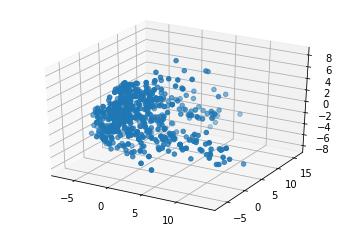

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(reduced_sentence_embeddings[:,0], reduced_sentence_embeddings[:,1], reduced_sentence_embeddings[:,2])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(reduced_sentence_embeddings)
lab = kmeans.labels_

In [ ]:
print(type(lab))
print(lab.shape)

<class 'numpy.ndarray'>
(724,)


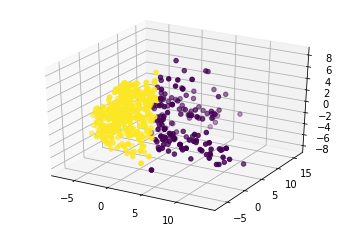

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(reduced_sentence_embeddings[:,0], reduced_sentence_embeddings[:,1], reduced_sentence_embeddings[:,2], c = lab)

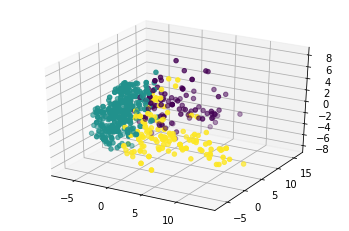

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(reduced_sentence_embeddings)
lab = kmeans.labels_
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(reduced_sentence_embeddings[:,0], reduced_sentence_embeddings[:,1], reduced_sentence_embeddings[:,2], c = lab)

In [ ]:
# 0 -> violet
# 1 -> green
# 2 -> yellow

In [ ]:
list(set(np.array(captions_list)[lab==0]))[:10]

['the 4 dogs fit on the chair. they are facing right.',
 'the dog.',
 'the ground is shiny. the skater',
 'the clown.',
 'A reflective mirror is in the reflective water',
 'the big banana is on the ground.',
 'a bird is on the pond. the turtle is in the bird. a white bird is a foot to the right of the bird.',
 'the ground is black. the ground is shiny.',
 'the sofie cow and the gary dog are next to each other. it is cloudy.  the ground is shiny grass.',
 'The ground is green. The sky is cloudy. A Klee goat is on the ground.  A red bird is above the goat. The ground is shiny. The ground has a grass texture.']

In [ ]:
list(set(np.array(captions_list)[lab==1]))[:10]

['the guillotine is on the enormous wood cube. the large brain is -3 foot in front of the guillotine. the brain is 3 feet above the cube. it is cloudy. the huge bird is 9 feet to the left of the cube. it is 19 feet above the grass ground. it is facing the cube. the barn is 45 feet behind the cube. it is morning.',
 'the egg is in front of the chicken. the egg is facing right. it is leaning 90 degrees.',
 'the penguin is on the shiny white mountain. the sky is cloudy. the ground is shiny sand. the small airplane is 15 feet above the mountain. the plane is behind the penguin. the matisse man is 4 feet in front of the penguin.',
 'the 80% reflective grey mountain is 2 feet in the shiny water ground. the mountain is 70 feet wide. the humongous 20% reflective white cat is 20 feet in the mountain. it is cloudy.  the red light is 10 feet in front of the cat. the red light is above the cat.  it is morning.',
 'the shiny black sphere is 2.5 feet above the ground. the white canoe is 2 feet in fr

In [ ]:
list(set(np.array(captions_list)[lab==2]))[:10]

['a cat and dog are on the table. they are 2 feet apart.',
 'a blue cat is to the left of the sofie cat. the cats are facing left. the judith cat is to the left of the blue cat. it is cloudy.',
 'the pencil is on the desk. the ant is on the pencil.',
 'the two cats fit on the chair. they are facing right.',
 'the horse. the very small camel is on the horse. the cat is on the very small camel. the horse is blue. the very small camel is red. the cat is black. the sky is white. the ground is yello. the illuminator is to the left of the horse. the illuminator is 10 feet away from the horse.',
 'the titian cat is 10 inches in front of the mirror. it is facing the mirror. the brown camera is -4 inches behind the cat. it is facing north. it is 8.5 inches above the ground. it is cloudy. it is morning. the blue light is 1 foot to the right of the camera. the red light is in front of the mirror. the bellows of the camera is blue. the lens of the camera is white. the tiny purple fish is 2 inches 

1. Relative complexity and the length of the sentence -> there is no exlicit length information in the embeddings, but it is interesting that it is being captured by the embedings
2. Differene in the relative position informtion -> second one has more numbers, i.e. the relative positions are in terms of numbers, they are more exact. while the third one has comparitively more abstract information and is more in terms of left, right etc. 
3. Number of objects -> 0 category has less number of objects (2-3) whereas the 1 and 2 category have more.
4. There is no difference in the types of objects - for examples, animals are everywhere. 

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


is_noun = lambda pos: pos[:2] == 'NN'
def nounCount(caption):
  tokenized = nltk.word_tokenize(caption)
  nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
  return len(nouns)

def uniqueNounCount(caption):
  tokenized = nltk.word_tokenize(caption)
  nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
  return len(set(nouns))


is_adjective = lambda pos: pos[:2] == 'JJ'
def adjectiveCount(caption):
  tokenized = nltk.word_tokenize(caption)
  nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_adjective(pos)] 
  return len(nouns)

def uniqueAdjectiveCount(caption):
  tokenized = nltk.word_tokenize(caption)
  nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_adjective(pos)] 
  return len(set(nouns))


is_number = lambda pos: pos[:2] == 'CD'
def numberCount(caption):
  tokenized = nltk.word_tokenize(caption.replace("-", ""))
  nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_number(pos)] 
  return len(nouns)

In [ ]:
def getMetricLists(lab, f):
  ret = []
  for i in range(3):
    l = [f(x) for x in list(set(np.array(captions_list)[lab==i]))]
    ret.append(l)
  return ret

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(array([[8.06228947e-03, 1.54619250e-03, 3.31326964e-04, 1.10442321e-04,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [5.53492098e-04, 1.71873862e-03, 2.73832933e-03, 2.38875537e-03,
         9.61328381e-04, 8.15672566e-04, 4.36967446e-04, 1.45655815e-04,
         2.03918141e-04, 8.73934892e-05],
        [3.92587940e-03, 2.43404523e-03, 1.96293970e-03, 7.06658291e-04,
         3.14070352e-04, 3.92587940e-04, 3.14070352e-04, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00]]),
 array([  3. , 102.5, 202. , 301.5, 401. , 500.5, 600. , 699.5, 799. ,
        898.5, 998. ]),
 <a list of 3 Lists of Patches objects>)

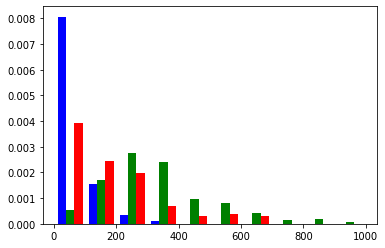

In [ ]:
a = getMetricLists(lab, len)
plt.hist([a[0], a[1], a[2]], color = ['b', 'g', 'r'], density = True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(array([[0.12877747, 0.02232143, 0.00343407, 0.00171703, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.01222826, 0.02943841, 0.03623188, 0.0321558 , 0.02083333,
         0.00996377, 0.00724638, 0.00407609, 0.0013587 , 0.00271739],
        [0.05981445, 0.0402832 , 0.03051758, 0.00732422, 0.00610352,
         0.00610352, 0.00488281, 0.0012207 , 0.        , 0.        ]]),
 array([ 1. ,  7.4, 13.8, 20.2, 26.6, 33. , 39.4, 45.8, 52.2, 58.6, 65. ]),
 <a list of 3 Lists of Patches objects>)

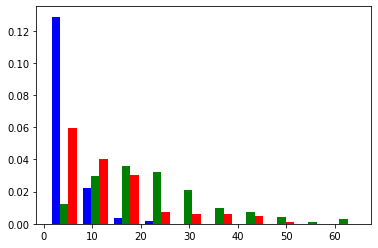

In [ ]:
a = getMetricLists(lab, nounCount)
plt.hist([a[0], a[1], a[2]], color = ['b', 'g', 'r'], density = True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(array([[0.25322504, 0.10511228, 0.04300048, 0.02866699, 0.00477783,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.00504096, 0.02394455, 0.05166982, 0.10081916, 0.07813485,
         0.05166982, 0.06805293, 0.04410838, 0.0063012 , 0.00504096],
        [0.09850543, 0.06453804, 0.04415761, 0.10190217, 0.05095109,
         0.03396739, 0.02038043, 0.01019022, 0.00679348, 0.00339674]]),
 array([ 1. ,  3.3,  5.6,  7.9, 10.2, 12.5, 14.8, 17.1, 19.4, 21.7, 24. ]),
 <a list of 3 Lists of Patches objects>)

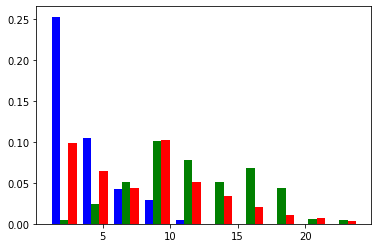

In [ ]:
a = getMetricLists(lab, uniqueNounCount)
plt.hist([a[0], a[1], a[2]], color = ['b', 'g', 'r'], density = True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(array([[0.51020408, 0.07849294, 0.10989011, 0.01569859, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.04554865, 0.08695652, 0.21118012, 0.10973085, 0.0931677 ,
         0.12215321, 0.02070393, 0.01035197, 0.00414079, 0.01035197],
        [0.20647321, 0.13950893, 0.17857143, 0.09486607, 0.02232143,
         0.04464286, 0.        , 0.02790179, 0.        , 0.        ]]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <a list of 3 Lists of Patches objects>)

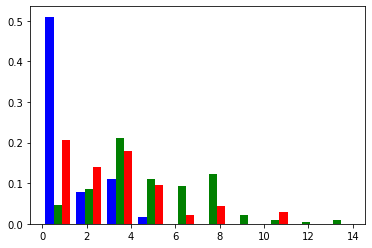

In [ ]:
a = getMetricLists(lab, uniqueAdjectiveCount)
plt.hist([a[0], a[1], a[2]], color = ['b', 'g', 'r'], density = True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(array([[0.61538462, 0.02930403, 0.02197802, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.17198068, 0.11980676, 0.19516908, 0.07149758, 0.05990338,
         0.0173913 , 0.01545894, 0.        , 0.0057971 , 0.00966184],
        [0.46354167, 0.09375   , 0.06770833, 0.01041667, 0.02083333,
         0.01041667, 0.        , 0.        , 0.        , 0.        ]]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <a list of 3 Lists of Patches objects>)

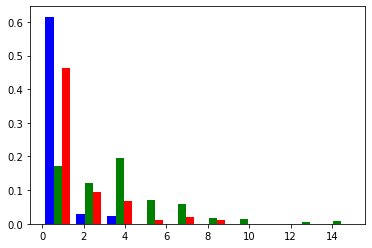

In [ ]:
a = getMetricLists(lab, numberCount)
plt.hist([a[0], a[1], a[2]], color = ['b', 'g', 'r'], density = True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(array([[73., 14.,  3.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [19., 59., 94., 82., 33., 28., 15.,  5.,  7.,  3.],
        [50., 31., 25.,  9.,  4.,  5.,  4.,  0.,  0.,  0.]]),
 array([  3. , 102.5, 202. , 301.5, 401. , 500.5, 600. , 699.5, 799. ,
        898.5, 998. ]),
 <a list of 3 Lists of Patches objects>)

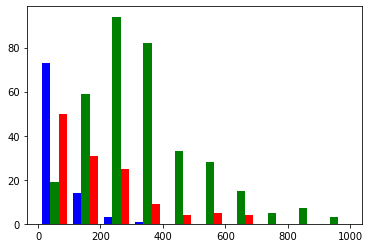

In [ ]:
plt.hist([zero_list, one_list, two_list], color = ['b', 'g', 'r'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(array([[8.06228947e-03, 1.54619250e-03, 3.31326964e-04, 1.10442321e-04,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [5.53492098e-04, 1.71873862e-03, 2.73832933e-03, 2.38875537e-03,
         9.61328381e-04, 8.15672566e-04, 4.36967446e-04, 1.45655815e-04,
         2.03918141e-04, 8.73934892e-05],
        [3.92587940e-03, 2.43404523e-03, 1.96293970e-03, 7.06658291e-04,
         3.14070352e-04, 3.92587940e-04, 3.14070352e-04, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00]]),
 array([  3. , 102.5, 202. , 301.5, 401. , 500.5, 600. , 699.5, 799. ,
        898.5, 998. ]),
 <a list of 3 Lists of Patches objects>)

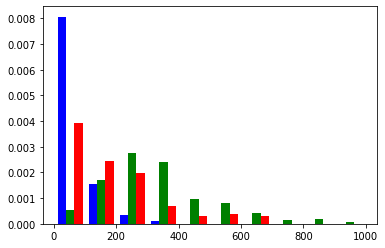

In [ ]:
# plt.hist([zero_list, one_list, two_list], color = ['b', 'g', 'r'], density = True)